## Observations and Insights 

In [447]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID', how='outer')
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [448]:
# Checking the number of mice.
unique_mice_list = merged_df['Mouse ID'].unique()
num_unique_mice = len(unique_mice_list)
num_unique_mice

249

In [449]:
#creating a new df to clean
no_dups_df = merged_df.copy()

In [450]:
dup_index = []
dup_mice = []
def duplicate_checker_dups(mID):
    mask = merged_df['Mouse ID'] == mID
    only_mID = merged_df.loc[mask, :]
    dups = only_mID.duplicated(subset='Timepoint')
    end_index = len(dups)
    global dup_index
    dup_index = dups[dups == True].index[0: end_index]
    for n in dup_index:
        a_dup_mouse = merged_df.iloc[n, 0]
        if a_dup_mouse not in dup_mice:
            dup_mice.append(a_dup_mouse)
        #global no_dups_df
        #no_dups_df.drop(n, inplace=True)
for x in unique_mice_list:
    duplicate_checker_dups(x)
#print(len(dup_mice))
#since end_mice_list has only one value, there's only one mouse with duplicates, index=0
dup_mouse = dup_mice[0] 

In [451]:
#info on duplicate mouse
#info on that mouse
mask_dup_mouse = no_dups_df['Mouse ID'] == dup_mouse
dup_info_df = pd.DataFrame(no_dups_df.loc[mask_dup_mouse, :])
dup_info_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [452]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#getting indices for the mouse with repeats
index_dups = dup_info_df.index.values
#dropping the rows with the repeat mouse
for i in index_dups:
    no_dups_df.drop(i, inplace=True) 
no_dups_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [313]:
# Checking the number of mice in the clean DataFrame.
#checking length of new df mouse list
unique_mice_list_new = no_dups_df['Mouse ID'].unique()
num_unique_mice_new = len(unique_mice_list_new)

#old list
original_mice_list = merged_df['Mouse ID'].unique()
num_original_mice = len(original_mice_list)
num_unique_mice_new, num_original_mice

(248, 249)

## Summary Statistics

In [337]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
no_dups_df_grouped = no_dups_df.groupby('Drug Regimen')
avg_tumour_size = no_dups_df_grouped['Tumor Volume (mm3)'].mean() 
avg_tumour_size = avg_tumour_size.rename('mean_vol')
median_tumour_size = no_dups_df_grouped['Tumor Volume (mm3)'].median()
median_tumour_size = median_tumour_size.rename('median_vol')
var_tumour = no_dups_df_grouped['Tumor Volume (mm3)'].var(ddof=0)
var_tumour = var_tumour.rename('variance_vol')
std_tumour = no_dups_df_grouped['Tumor Volume (mm3)'].std(ddof=0)
std_tumour = std_tumour.rename('standardDev_vol')
#SEM is unbiased standard error of the mean
sem_tumour = no_dups_df_grouped['Tumor Volume (mm3)'].sem(ddof=0)
sem_tumour = sem_tumour.rename('SEM_vol')

summary_df = pd.concat([avg_tumour_size, median_tumour_size, var_tumour, std_tumour, sem_tumour], axis=1)
summary_df

,mean_vol,median_vol,variance_vol,standardDev_vol,SEM_vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
Propriva,52.320930,50.446266,43.555716,6.599675,0.542490
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526


In [340]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summstats = no_dups_df_grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summstats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Measurements'>

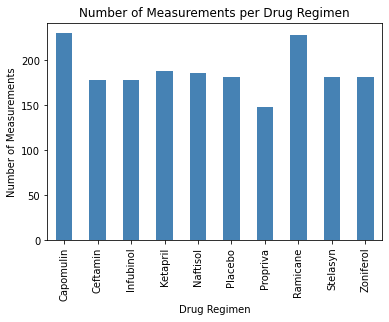

In [396]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
no_dups_df_grouped = no_dups_df.groupby('Drug Regimen')
num_measurements_df = pd.DataFrame(no_dups_df_grouped['Drug Regimen'].count()).rename(columns=({'Drug Regimen': 'Number of Measurements'}))

num_measurements_df.plot(kind='bar', title='Number of Measurements per Drug Regimen', color='steelblue', legend=None, ylabel='Number of Measurements')

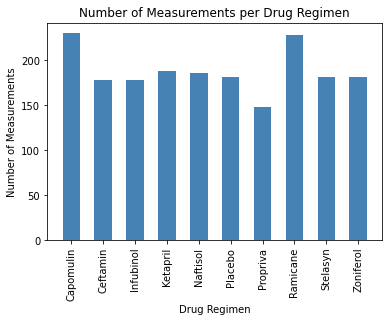

In [395]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = num_measurements_df.index
y_axis = num_measurements_df['Number of Measurements']

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.title('Number of Measurements per Drug Regimen')
plt.bar(x_axis, y_axis, width=0.55, color='steelblue')
plt.xticks(x_axis, rotation=90)
plt.show()

<AxesSubplot:title={'center':'Gender Distribution of Mice in Experiment'}>

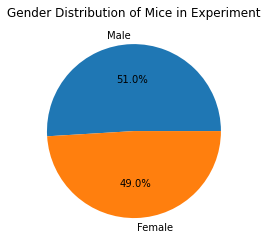

In [391]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = no_dups_df['Sex'].value_counts()
mice_sex.plot(kind='pie', title='Gender Distribution of Mice in Experiment', autopct='%1.1f%%', label='')

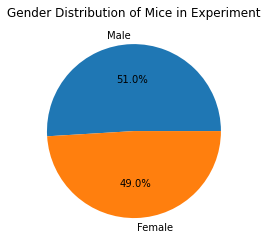

In [393]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = mice_sex
labels = mice_sex.index

plt.pie(mice_sex, labels=labels, autopct='%1.1f%%')
plt.title('Gender Distribution of Mice in Experiment')
plt.show()

## Quartiles, Outliers and Boxplots

In [400]:
no_dups_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [466]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumour_vol = []
tvols_times = {}
def last_time (treatment):
    max_timepoint = -1
    tumour_values = []
    timepoints = []
    final_tumour_vol = 0
    for x in range(0, (len(no_dups_df)-1)):
        if (no_dups_df.iloc[x, 1] == treatment) & (no_dups_df.iloc[x, 5] > max_timepoint):
            max_timepoint = no_dups_df.iloc[x, 5]
    for x in range(0, (len(no_dups_df)-1)):
        if (no_dups_df.iloc[x, 1] == treatment) & (no_dups_df.iloc[x, 5] == max_timepoint): 
            tumour_values.append(no_dups_df.iloc[x, 6])
    print(f'{treatment}: {tumour_values}')
for name in treatments:
    last_time(name)

#tvols_times_df = pd.DataFrame(tvols_times).T.rename(columns={0: 'startvol/vol_at_T0', 1: 'vol_at_T5', 2: 'vol_at_T10', 3: 'vol_at_T5', 4: 'vol_at_T20', 5: 'vol_at_T25', 6: 'vol_at_T30', 7: 'vol_at_T35', 8: 'vol_at_T40', 9: 'finalvol/vol_at_T45'}).T
#tvols_times_df = tvols_times_df.T

#tvol_dict = {'Treatments': treatments, 'Tumor_vol': tumour_vol}
#tumour_vol_df = pd.DataFrame(tvol_dict)
#tumour_vol_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#tvols_times_df

Capomulin: [23.34359787, 28.48403281, 28.43096411, 31.02392294, 31.896238399999998, 32.37735684, 33.32909778, 34.45529799, 37.31184577, 36.04104736, 37.07402422, 38.84687569, 38.93963263, 38.98287774, 38.125164399999996, 40.65812366, 40.1592203, 40.72857787, 41.48300765, 41.58152074, 47.68596303]
Ramicane: [22.05012627, 29.12847181, 30.27623175, 30.56462509, 30.63869575, 31.56046955, 31.09533505, 33.39765251, 32.97852192, 33.56240217, 36.13485243, 38.81036633, 37.22565033, 36.37451039, 37.31123552, 38.407618299999996, 40.65900627, 40.66771292, 45.22086888, 43.04754260000001]
Infubinol: [67.97341878, 65.52574285, 66.08306589, 72.2267309, 62.43540402, 60.91876652, 66.19691151, 67.68556862, 62.75445141]
Ceftamin: [62.99935619, 61.84902336, 68.92318457, 67.74866174, 59.85195552, 64.29983003, 59.74190064, 61.43389223, 67.52748237, 64.63494887, 61.38666032, 68.59474498, 64.72983655]


In [605]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
ca_list = []
ra_list = []
in_list = []
ce_list = []
#capo_series = pd.Series(dtype='float')
#ram_series = pd.Series(dtype='float')
#infu_series = pd.Series(dtype='float')
#cef_series = pd.Series(dtype='float')
list_of_lists = [ca_list, ra_list, in_list, ce_list]

treatment_last_times = {}
tumour_vol = []
final_vols_dict = {}
def last_time (treatment):
    max_timepoint = -1
    tumour_values = []
    timepoints = []
    final_tumour_vol = 0
    for x in range(0, (len(no_dups_df)-1)):
        if (no_dups_df.iloc[x, 1] == treatment) & (no_dups_df.iloc[x, 5] > max_timepoint):
            max_timepoint = no_dups_df.iloc[x, 5]
    treatment_last_times[treatment] = max_timepoint
def last_values (treatment, max_time, list_name):
    mask = (no_dups_df['Drug Regimen'] == treatment) & (no_dups_df['Timepoint'] == max_time)
    only_med = no_dups_df.loc[mask, :]
    list_name.append(only_med.iloc[:, 6])
    #print(len(only_med))
    #print(list_name)
    
for name in treatments:
    last_time(name)
    max_time = treatment_last_times[name]
    thelist = list_of_lists[treatments.index(name)]
    last_values(name, max_time, thelist)

print(f'last timepoint: {treatment_last_times}')

ca_df = pd.DataFrame(ca_list).T.reset_index(drop=True).rename(columns = {'Tumor Volume (mm3)': 'Tumor Vol(mm3) at T45'})
ra_df = pd.DataFrame(ra_list).T.reset_index(drop=True).rename(columns = {'Tumor Volume (mm3)': 'Tumor Vol(mm3) at T45'})
in_df = pd.DataFrame(in_list).T.reset_index(drop=True).rename(columns = {'Tumor Volume (mm3)': 'Tumor Vol(mm3) at T45'})
ce_df = pd.DataFrame(ce_list).T.reset_index(drop=True).rename(columns = {'Tumor Volume (mm3)': 'Tumor Vol(mm3) at T45'})

ca_df, ra_df, in_df, ce_df


last timepoint: {'Capomulin': 45, 'Ramicane': 45, 'Infubinol': 45, 'Ceftamin': 45}


(    Tumor Vol(mm3) at T45
 0               23.343598
 1               28.484033
 2               28.430964
 3               31.023923
 4               31.896238
 5               32.377357
 6               33.329098
 7               34.455298
 8               37.311846
 9               36.041047
 10              37.074024
 11              38.846876
 12              38.939633
 13              38.982878
 14              38.125164
 15              40.658124
 16              40.159220
 17              40.728578
 18              41.483008
 19              41.581521
 20              47.685963,
     Tumor Vol(mm3) at T45
 0               22.050126
 1               29.128472
 2               30.276232
 3               30.564625
 4               30.638696
 5               31.560470
 6               31.095335
 7               33.397653
 8               32.978522
 9               33.562402
 10              36.134852
 11              38.810366
 12              37.225650
 13              36.374510


In [608]:
df_list = [ca_df, ra_df, in_df, ce_df]

for x in range(0, len(treatments)):
    treatment_name = treatments[x]
    reg_df = df_list[x]
    quants = reg_df.quantile([0.25,0.5,0.75])
    q1 = quants.iloc[0, 0]
    reg_mean = quants.iloc[1, 0]
    q3 = quants.iloc[2, 0]
    iqr = q3 - q1
    upperbound = q3 + (1.5 * iqr)
    lowerbound = q1 - (1.5 * iqr)
    print(f'{treatment_name}:')
    print(f'Q1: {q1}, Q3: {q3}')
    print(f'iqr: {iqr}')
    print(f'upper bound: {upperbound}, lower bound: {lowerbound}')
    mask = (reg_df ["Tumor Vol(mm3) at T45"] > upperbound) | (reg_df ["Tumor Vol(mm3) at T45"] < lowerbound)
    outliers = reg_df.loc[mask, :]  
    print(f'Potential outliers for {treatment_name} would be below {lowerbound} or above {upperbound}. There are {len(outliers)} potential outliers in the dataset.')
    

Capomulin:
Q1: 32.37735684, Q3: 40.1592203
iqr: 7.781863460000004
upper bound: 51.83201549, lower bound: 20.70456164999999
Potential outliers for Capomulin would be below 20.70456164999999 or above 51.83201549. There are 0 potential outliers in the dataset.
Ramicane:
Q1: 30.981175224999998, Q3: 38.508305307499995
iqr: 7.527130082499998
upper bound: 49.79900043124999, lower bound: 19.690480101250003
Potential outliers for Ramicane would be below 19.690480101250003 or above 49.79900043124999. There are 0 potential outliers in the dataset.
Infubinol:
Q1: 62.75445141, Q3: 67.68556862
iqr: 4.9311172099999965
upper bound: 75.08224443499999, lower bound: 55.35777559500001
Potential outliers for Infubinol would be below 55.35777559500001 or above 75.08224443499999. There are 0 potential outliers in the dataset.
Ceftamin:
Q1: 61.43389223, Q3: 67.52748237
iqr: 6.093590140000003
upper bound: 76.66786758, lower bound: 52.29350701999999
Potential outliers for Ceftamin would be below 52.293507019999

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Text(0.5, 1.0, 'Drug Regimen Final Tumor Size ')

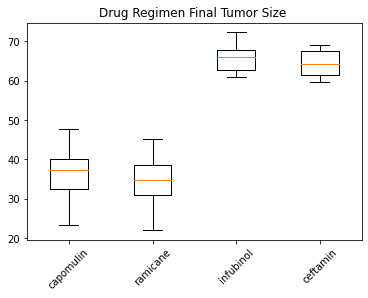

In [609]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'


ca_xaxis = ca_df.iloc[:, 0]
ra_xaxis = ra_df.iloc[:, 0]
in_xaxis = in_df.iloc[:, 0]
ce_xaxis = ce_df.iloc[:, 0]
regimens_dict = {'capomulin': ca_xaxis, 'ramicane': ra_xaxis, 'infubinol': in_xaxis, 'ceftamin': ce_xaxis}

fig, ax = plt.subplots()
ax.boxplot(regimens_dict.values())
ax.set_xticklabels(regimens_dict.keys(), rotation=45)
ax.set_title('Drug Regimen Final Tumor Size ')

## Line and Scatter Plots

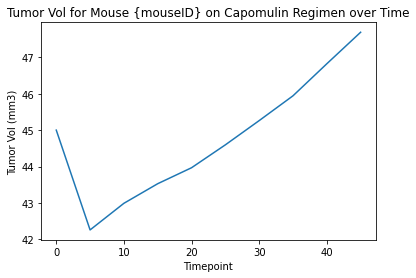

In [624]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouseID = 'i557'
capmousemask = (no_dups_df['Drug Regimen'] == 'Capomulin') & (no_dups_df['Mouse ID'] == mouseID)
only_cap_mouse = no_dups_df.loc[capmousemask, :]   

x_axis = only_cap_mouse.iloc[:, 5]
y_axis = only_cap_mouse.iloc[:, 6]


plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Vol (mm3)')
plt.title('Tumor Vol for Mouse {mouseID} on Capomulin Regimen over Time')
plt.show()

y = 0.895x + 22.764
correlation coefficient: 0.950524396185527


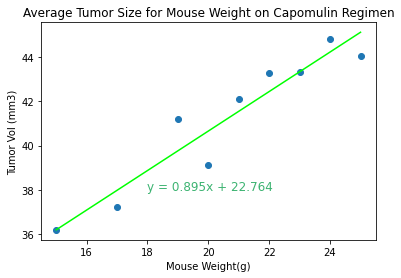

In [657]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capmask = (no_dups_df['Drug Regimen'] == 'Capomulin')
only_cap = no_dups_df.loc[capmask, :]  
only_cap_grouped = only_cap.groupby('Weight (g)')
avg_tum_vol = only_cap_grouped['Tumor Volume (mm3)'].mean().reset_index(drop=False)

x_axis_weight = avg_tum_vol.iloc[:, 0]
y_axis_vol = avg_tum_vol.iloc[:, 1]

plt.scatter(x_axis_weight, y_axis_vol)
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Tumor Vol (mm3)')
plt.title('Average Tumor Size for Mouse Weight on Capomulin Regimen')
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_weight, y_axis_vol)
display_line_eq = f'y = {round(slope, 3)}x + {round(intercept, 3)}'
lin_reg_mod = (slope * x_axis_weight) + intercept
print(display_line_eq)
print(f'correlation coefficient: {rvalue}')
plt.plot(x_axis_weight, lin_reg_mod, color='lime')
plt.annotate(display_line_eq, (18,38),fontsize=12,color="mediumseagreen")
plt.show()

## Correlation and Regression
(see above for linear regression)